___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Clustering (Customer Segmentation) Project***". This is the last medium project of ***Machine Learning*** course. 

At the end of this project, you will have performed ***Cluster Analysis*** with an ***Unsupervised Learning*** method.

---

In this project, customers are required to be segmented according to the purchasing history obtained from the membership cards of a big mall.

This project is less challenging than other projects. After getting to know the data set quickly, you are expected to perform ***Exploratory Data Analysis***. You should observe the distribution of customers according to different variables, also discover relationships and correlations between variables. Then you will spesify the different variables to use for cluster analysis.

The last step in customer segmentation is to group the customers into distinct clusters based on their characteristics and behaviors. One of the most common methods for clustering is ***K-Means Clustering***, which partitions the data into k clusters based on the distance to the cluster centroids. Other clustering methods include ***hierarchical clustering***, density-based clustering, and spectral clustering. Each cluster can be assigned a label that describes its main features and preferences.

- ***NOTE:*** *This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind Cluster Analysis and scikit-learn module as well as Machine Learning before you begin.*

---
---

# #Tasks

Mentoring Prep. and self study#### 

#### 1. Import Libraries, Load Dataset, Exploring Data
- Import Libraries
- Load Dataset
- Explore Data

#### 2. Exploratory Data Analysis (EDA)


#### 3. Cluster Analysis

- Clustering based on Age and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Clustering based on Annual Income and Spending Score

    *i. Create a new dataset with two variables of your choice*
    
    *ii. Determine optimal number of clusters*
    
    *iii. Apply K Means*
    
    *iv. Visualizing and Labeling All the Clusters*
    
    
- Hierarchical Clustering

    *i. Determine optimal number of clusters using Dendogram*

    *ii. Apply Agglomerative Clustering*

    *iii. Visualizing and Labeling All the Clusters* 

- Conclusion

---
---

## 1. Import Libraries, Load Dataset, Exploring Data

There is a big mall in a specific city that keeps information of its customers who subscribe to a membership card. In the membetrship card they provide following information : gender, age and annula income. The customers use this membership card to make all the purchases in the mall, so tha mall has the purchase history of all subscribed members and according to that they compute the spending score of all customers. You have to segment these customers based on the details given. 

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
%matplotlib inline
sns.set_style('whitegrid')
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

#### Load Dataset

In [2]:
df = pd.read_csv("Mall_Customers.csv")

#### Explore Data

You can rename columns to more usable, if you need.

In [3]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [6]:
# Using rename() method
df.rename(columns={'Annual Income (k$)':'annual_income', 'Spending Score (1-100)':'spending_score' }, inplace=True)

# Alternatively, you can directly assign new column names to the 'columns' attribute
#'df.columns = ['new_col1', 'new_col2', 'new_col3']

In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'annual_income', 'spending_score'], dtype='object')

In [8]:
df = df.drop("CustomerID", axis=1)  # Droping the CustomerID Column. Because the column is not needed to analyze.

In [9]:
df.head()

,Gender,Age,annual_income,spending_score
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [10]:
df.shape

(200, 4)

In [11]:
df.duplicated().value_counts()

False    200
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          200 non-null    object
 1   Age             200 non-null    int64 
 2   annual_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [13]:
df.isna().sum()

Gender            0
Age               0
annual_income     0
spending_score    0
dtype: int64

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.0,70.0
annual_income,200.0,60.56,26.264721,15.0,41.50,61.5,78.0,137.0
spending_score,200.0,50.20,25.823522,1.0,34.75,50.0,73.0,99.0


In [15]:
df.describe(include="object").T

,count,unique,top,freq
Gender,200,2,Female,112


## 2. Exploratory Data Analysis (EDA)

After performing Cluster Analysis, you need to know the data well in order to label the observations correctly. Analyze frequency distributions of features, relationships and correlations between the independent variables and the dependent variable. It is recommended to apply data visualization techniques. Observing breakpoints helps you to internalize the data.





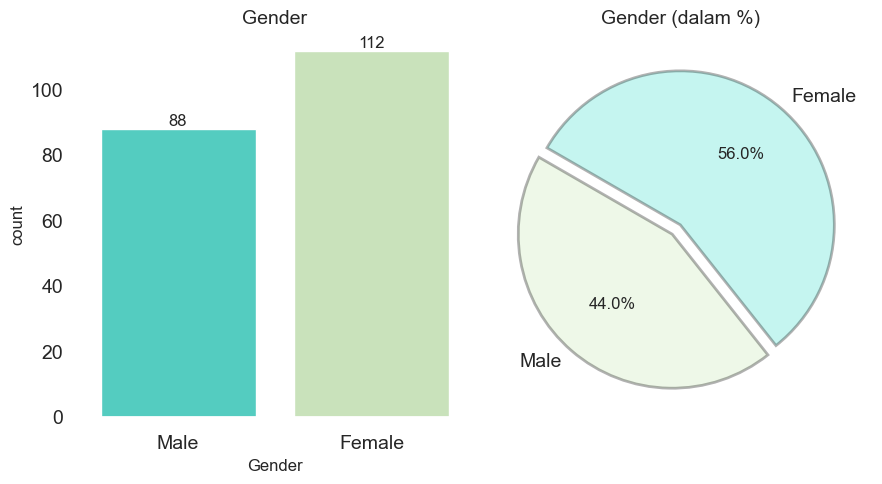

In [16]:
sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':14,'ytick.labelsize':14, 'figure.autolayout':True})
plt.subplots(figsize=(9,5))
my_pal = ('#40E0D0', '#c7e9b4')
my_xpl = [0.0, 0.08]

plt.subplot(1,2,1)
plt.title('Gender',fontsize=14)
ax = sns.countplot(x='Gender', data=df, palette=my_pal)
ax.bar_label(container=ax.containers[0],labels = df['Gender'].value_counts(ascending = True))


plt.subplot(1,2,2)
plt.title('Gender (dalam %)',fontsize=14)
df['Gender'].value_counts().plot(kind='pie', colors=my_pal, legend=None, explode=my_xpl, ylabel='', counterclock=False, startangle=150, wedgeprops={'alpha':0.3, 'edgecolor' : 'black','linewidth': 2, 'antialiased': True}, autopct='%1.1f%%')

plt.show()

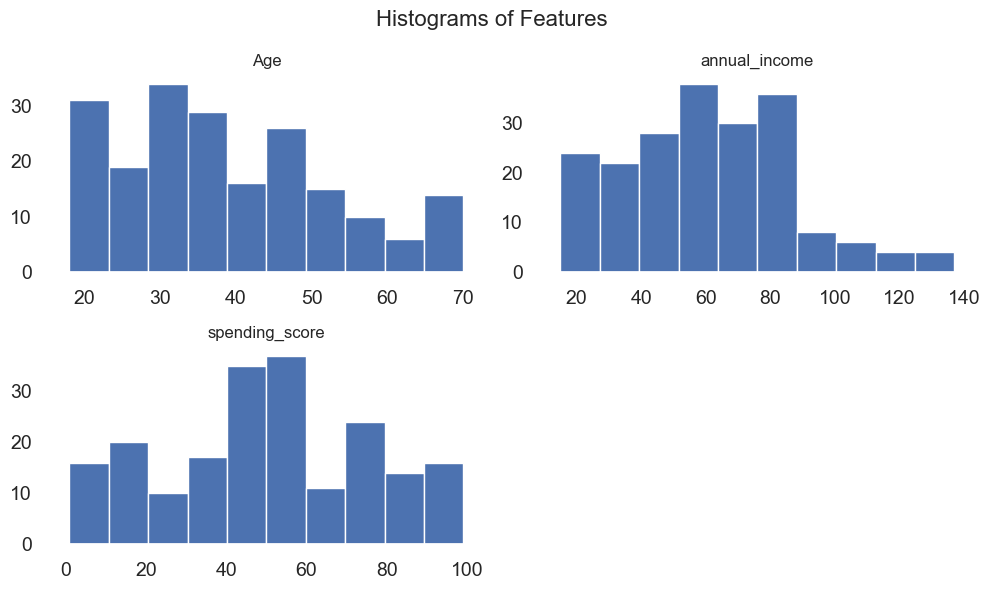

In [17]:
df.hist(figsize=(10, 6))
plt.suptitle('Histograms of Features', fontsize=16)
plt.show()

Text(0.5, 0, '')

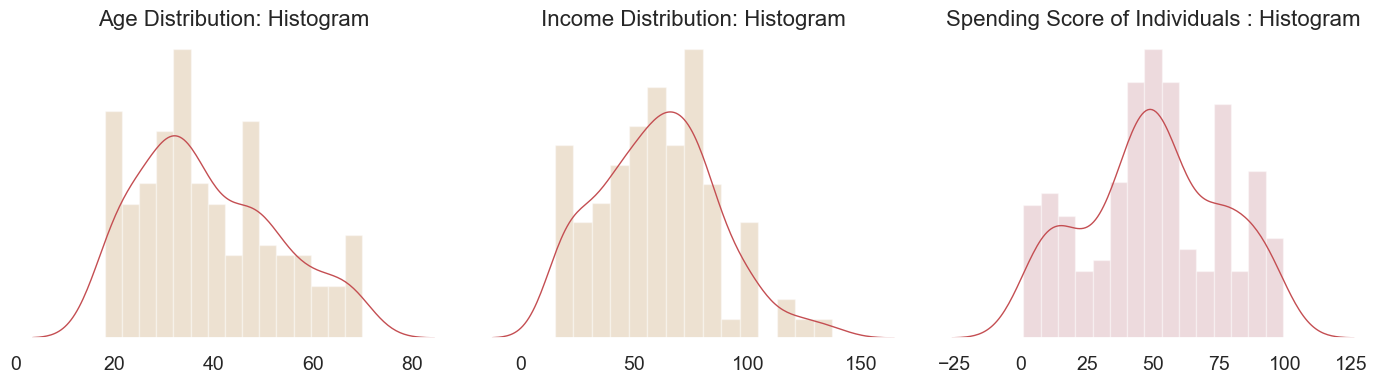

In [18]:
plt.subplots(figsize=(14, 4))

plt.subplot(1, 3, 1)
plt.title('Age Distribution: Histogram', fontsize=16)
sns.distplot(df['Age'], color='#D2B48C', bins=15, kde_kws={'linewidth': 1, 'color': 'r'})
plt.ylabel(None)
plt.yticks([])
plt.xlabel(None)

plt.subplot(1, 3, 2)
plt.title('Income Distribution: Histogram', fontsize=16)
sns.distplot(df['annual_income'], color='#D2B48C', bins=15, kde_kws={'linewidth': 1, 'color': 'r'})
plt.ylabel(None)
plt.yticks([])
plt.xlabel(None)

plt.subplot(1,3,3)
plt.title('Spending Score of Individuals : Histogram', fontsize=16)
sns.distplot(df['spending_score'], color='#D2A4AC', bins=15, kde_kws={'linewidth':1,'color':'r'})
plt.ylabel(None)
plt.yticks([])
plt.xlabel(None)


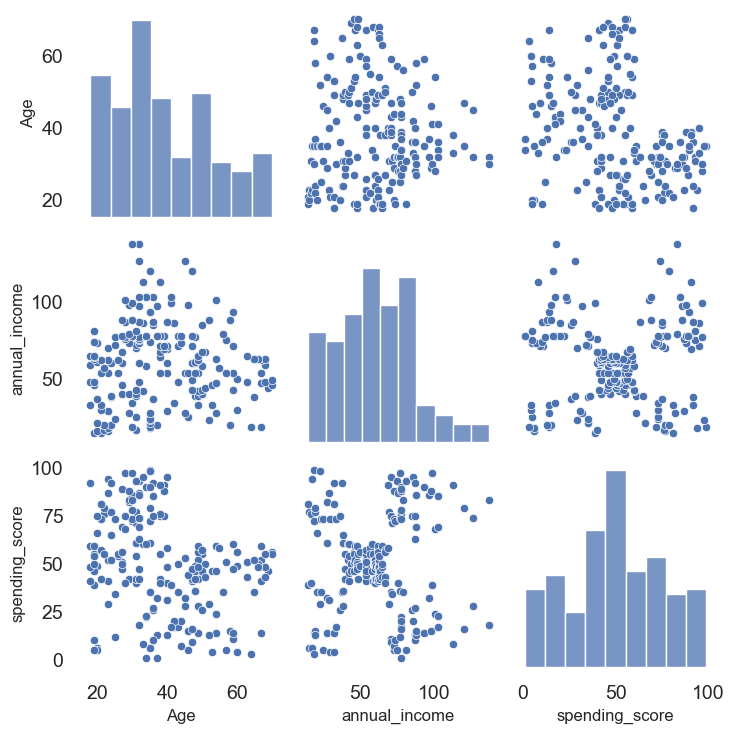

In [19]:
sns.pairplot(df)
plt.show()

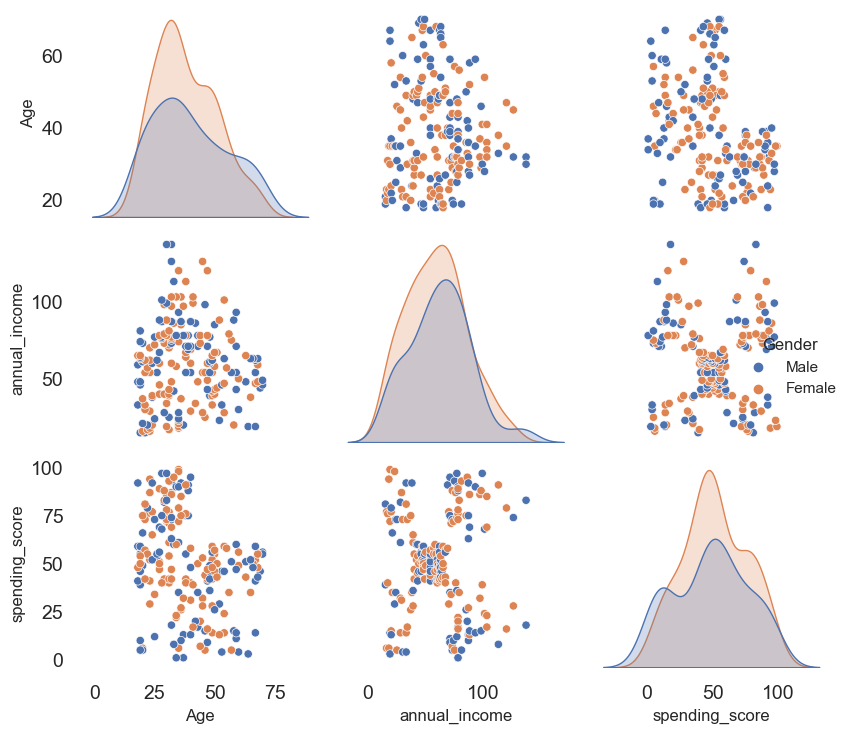

In [20]:
sns.pairplot(df, hue='Gender')

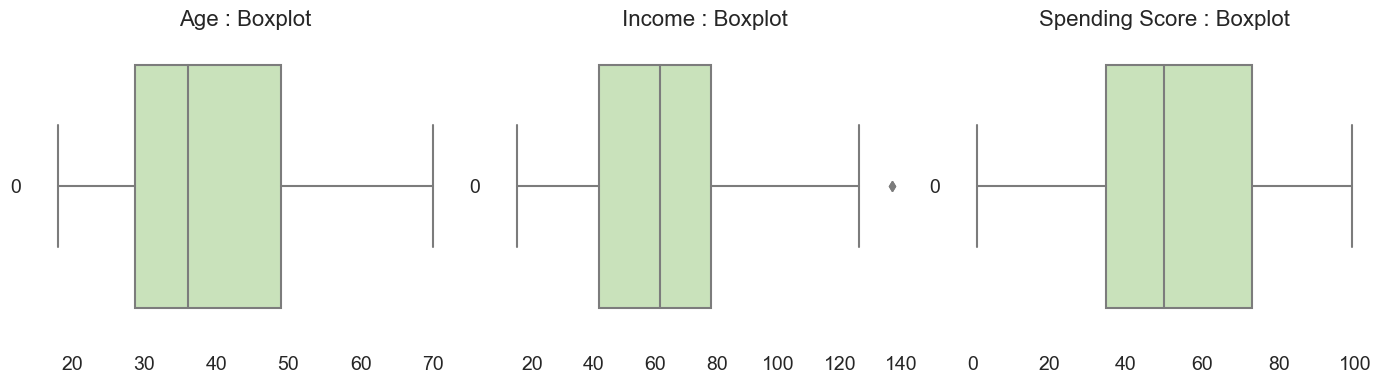

In [21]:
plt.subplots(figsize=(14,4))
plt.subplot(1,3,1)
plt.title('Age : Boxplot', fontsize=16)
sns.boxplot(df['Age'], color='#c7e9b4', orient="h")
plt.xlabel(None)
plt.ylabel(None)

plt.subplot(1,3,2)
plt.title('Income : Boxplot', fontsize=16)
sns.boxplot(df['annual_income'], color='#c7e9b4', orient="h")
plt.xlabel(None)
plt.ylabel(None)

plt.subplot(1,3,3)
plt.title('Spending Score : Boxplot', fontsize=16)
sns.boxplot(df['spending_score'], color='#c7e9b4', orient="h")
plt.xlabel(None)
plt.ylabel(None)

plt.show();

In [22]:
from ipywidgets import widgets
from IPython.display import clear_output  # Add this import statement

def plot_histogram(feature):
    plt.figure(figsize=(6, 4))
    plt.hist(df[feature], bins=10, alpha=0.7)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {feature}')
    plt.grid(True)
    plt.show()

feature_dropdown = widgets.Dropdown(
    options=list(df.columns),
    description='Select Feature:',
    layout={'width': '300px'}
)

def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        clear_output(wait=True)
        plot_histogram(change['new'])

feature_dropdown.observe(on_change)

display(feature_dropdown)

Dropdown(description='Select Feature:', layout=Layout(width='300px'), options=('Gender', 'Age', 'annual_income…

In [23]:
cor = df.corr()
cor

,Age,annual_income,spending_score
Age,1.000000,-0.012398,-0.327227
annual_income,-0.012398,1.000000,0.009903
spending_score,-0.327227,0.009903,1.000000


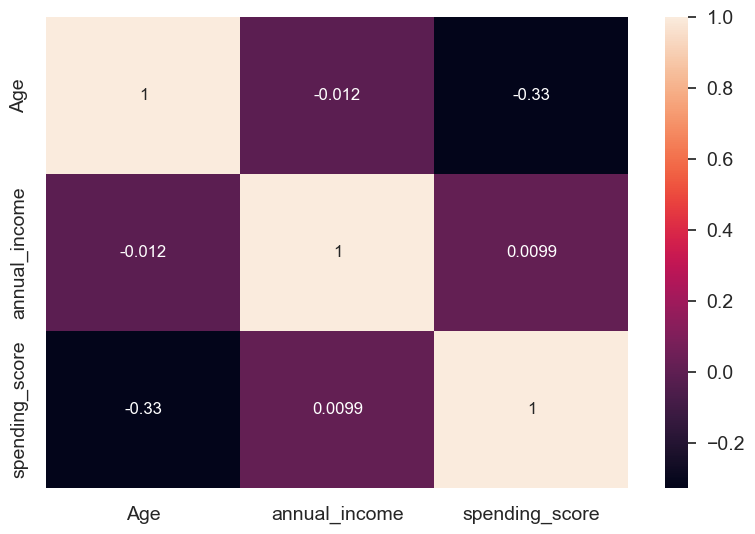

In [24]:
sns.heatmap(cor, annot=True)
plt.show()

##  Cluster Analysis

The purpose of the project is to perform cluster analysis using [K-Means](https://towardsdatascience.com/understanding-k-means-clustering-in-machine-learning-6a6e67336aa1) and [Hierarchical Clustering](https://medium.com/analytics-vidhya/hierarchical-clustering-d2d92835280c) algorithms.
Using a maximum of two variables for each analysis can help to identify cluster labels more clearly.
The K-Means algorithm requires determining the number of clusters using the [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering), while Hierarchical Clustering builds a dendrogram without defining the number of clusters beforehand. Different labeling should be done based on the information obtained from each analysis.
Labeling example: 

- **Normal Customers**  -- An Average consumer in terms of spending and Annual Income
- **Spender Customers** --  Annual Income is less but spending high, so can also be treated as potential target customer.

### Clustering based on Age and Spending Score

#### *i. Create a new dataset with two variables of your choice*

In [25]:
X = df.drop(columns="Gender")
X

,Age,annual_income,spending_score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [26]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [27]:
# function to compute hopkins's statistic for the dataframe X
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
      X = X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    #a random sample of size sample_size from the original data X1
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [28]:
hopkins(X, 1)

0.6997501949677207

In [29]:
X1 = X[['Age', 'spending_score']]

In [30]:
X1

,Age,spending_score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [31]:
X1.shape

(200, 2)

In [32]:
hopkins(X1, 1)

0.6849684268398789

#### *ii. Determine optimal number of clusters*

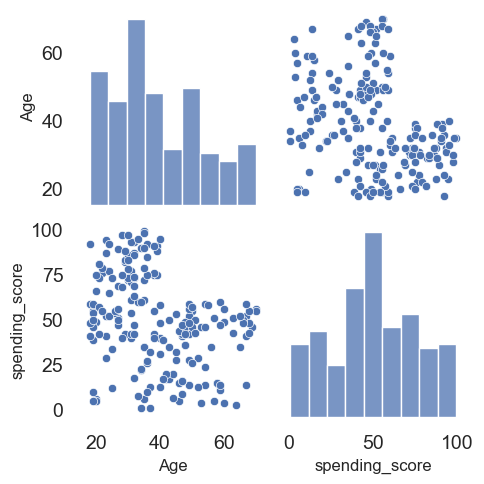

In [33]:
sns.pairplot(X1)

### Distortion

Distortion, also known as within-cluster sum of squares, is a metric used to evaluate the quality of clustering in unsupervised learning algorithms, particularly in the context of K-means clustering. The goal of K-means clustering is to minimize the distortion, which represents the sum of squared distances between each data point and its assigned cluster centroid.

The formula to calculate distortion is as follows:

Distortion = Σ (Distance to Cluster Centroid)^2

Where:

Σ represents the summation over all data points in the dataset.
Distance to Cluster Centroid is the Euclidean distance between each data point and its assigned cluster centroid (the mean of the cluster).
The lower the distortion value, the better the data points are clustered around their respective centroids. In other words, lower distortion indicates more compact and well-separated clusters.

K-means clustering works by iteratively updating the cluster centroids to minimize the distortion. The algorithm assigns data points to the nearest centroid in each iteration, and then updates the centroids based on the new cluster assignments. This process continues until the centroids stabilize, or a predefined number of iterations is reached.

To find the optimal number of clusters (K) for K-means, you can use the elbow method, which involves plotting the distortion values for different values of K and selecting the K value at the "elbow" of the plot, where the distortion starts to level off. The elbow point represents a good trade-off between minimizing distortion and avoiding overfitting.

Remember that while distortion is a useful metric for evaluating K-means clustering, it is not the only metric. Other metrics like silhouette score, Davies-Bouldin index, or visual inspection of the clusters may also be considered for a comprehensive evaluation of the clustering results.

In [34]:
K = range(2, 9)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeanModel.fit(X1)
    distances = kmeanModel.transform(X1)  
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[
            labels == i, i
        ]  # distances from observations in each cluster to their own centroid
        result.append(np.mean(cluster_distances**2))
    distortion.append(sum(result))

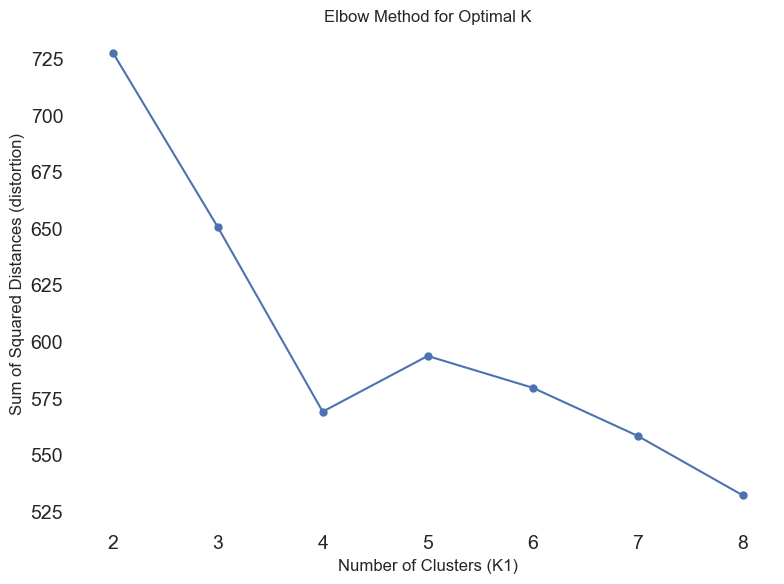

In [35]:
plt.figure(figsize=(8, 6))
plt.plot(K, distortion, marker='o')  # Plots the sum of squared distances against different values of K
plt.xlabel('Number of Clusters (K1)')    # Sets the label for the x-axis
plt.ylabel('Sum of Squared Distances (distortion)')  # Sets the label for the y-axis
plt.title('Elbow Method for Optimal K')  # Sets the title of the plot
plt.grid(True)  # Enables grid lines on the plot
plt.show()  # Displays the plot

In [38]:
### distortion
K = range(2, 10)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeanModel.fit(X1)
    distances = kmeanModel.transform(X1)  # Use X2 for transformation instead of X
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[
            labels == i, i
        ]  # distances from observations in each cluster to their own centroid
        result.append(np.mean(cluster_distances**2))
    distortion.append(sum(result))

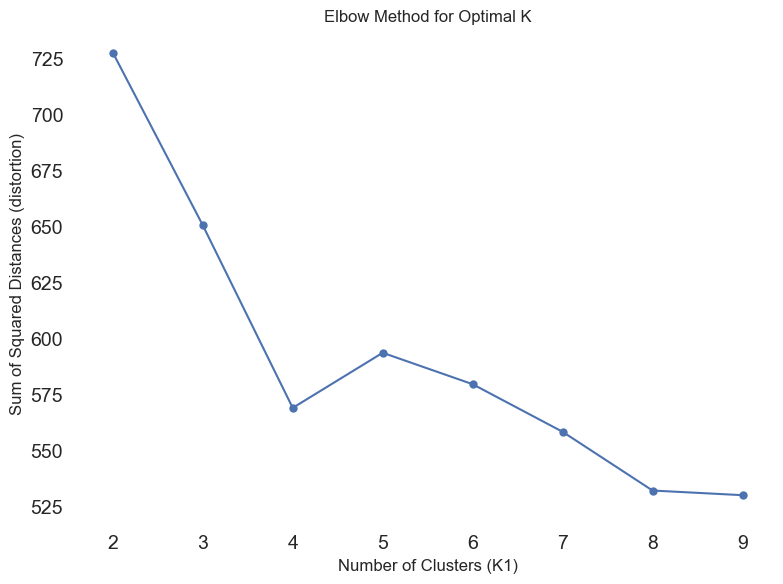

In [39]:
plt.figure(figsize=(8, 6))
plt.plot(K, distortion, marker='o')  # Plots the sum of squared distances against different values of K
plt.xlabel('Number of Clusters (K1)')    # Sets the label for the x-axis
plt.ylabel('Sum of Squared Distances (distortion)')  # Sets the label for the y-axis
plt.title('Elbow Method for Optimal K')  # Sets the title of the plot
plt.grid(True)  # Enables grid lines on the plot
plt.show()  # Displays the plot

###  Inertia

Inertia, in the context of clustering algorithms like K-means, is another term used to represent the within-cluster sum of squares. It is a measure of how far the data points are from their assigned cluster centroids.

The goal of K-means clustering is to minimize inertia, which is equivalent to minimizing the sum of squared distances between each data point and its assigned cluster centroid. A lower inertia value indicates that the data points are closer to their respective centroids, suggesting better-defined and more compact clusters.

The formula to calculate inertia is similar to the distortion formula:

Inertia = Σ (Distance to Cluster Centroid)^2

Where:

Σ represents the summation over all data points in the dataset.
Distance to Cluster Centroid is the Euclidean distance between each data point and its assigned cluster centroid (the mean of the cluster).
Like distortion, inertia is used as an optimization criterion in K-means clustering. The K-means algorithm works by iteratively updating the cluster centroids to minimize the inertia. It assigns data points to the nearest centroid in each iteration and then updates the centroids based on the new cluster assignments.

Similarly to finding the optimal number of clusters using the elbow method with distortion, you can use the same approach with inertia. Plot the inertia values for different values of K and select the K value at the "elbow" of the plot, where the inertia starts to level off, indicating a good trade-off between minimizing inertia and avoiding overfitting.

In summary, inertia is a measure used in K-means clustering to evaluate the quality of the clustering solution and to find the optimal number of clusters. Lower inertia values generally indicate better-defined clusters with data points close to their respective centroids.

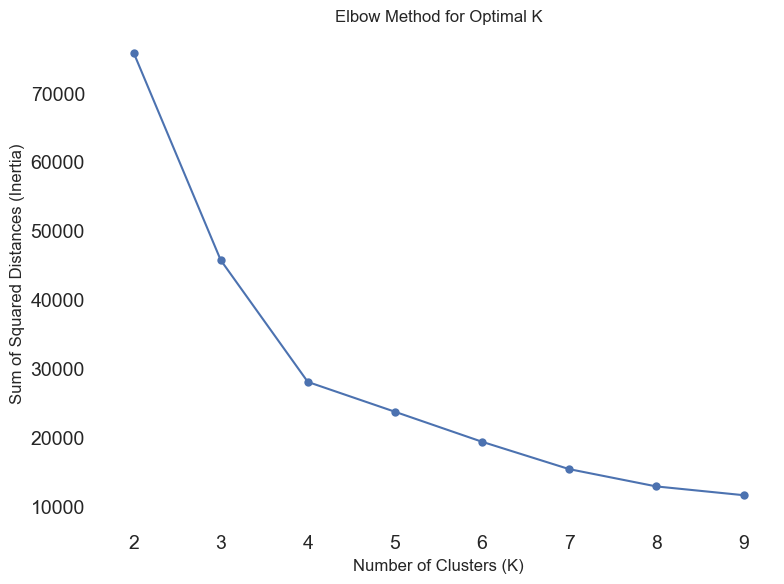

In [40]:
ssd = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X1)
    ssd.append(kmeans.inertia_)  # Inertia represents the sum of squared distances to the nearest centroid


plt.figure(figsize=(8, 6))
plt.plot(range(2, 10), ssd, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

#### Silhoutte Score

In [41]:
range_n_clusters = range(2, 10)
for num_clusters in range_n_clusters:
    # Initialize kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    kmeans.fit(X1)
    cluster_labels = kmeans.labels_
    # Silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4692341232501655
For n_clusters=3, the silhouette score is 0.45300127016521263
For n_clusters=4, the silhouette score is 0.49973941540141753
For n_clusters=5, the silhouette score is 0.43350225495428363
For n_clusters=6, the silhouette score is 0.4376965763059772
For n_clusters=7, the silhouette score is 0.42313509747504796
For n_clusters=8, the silhouette score is 0.43215030177487107
For n_clusters=9, the silhouette score is 0.41485342159923116


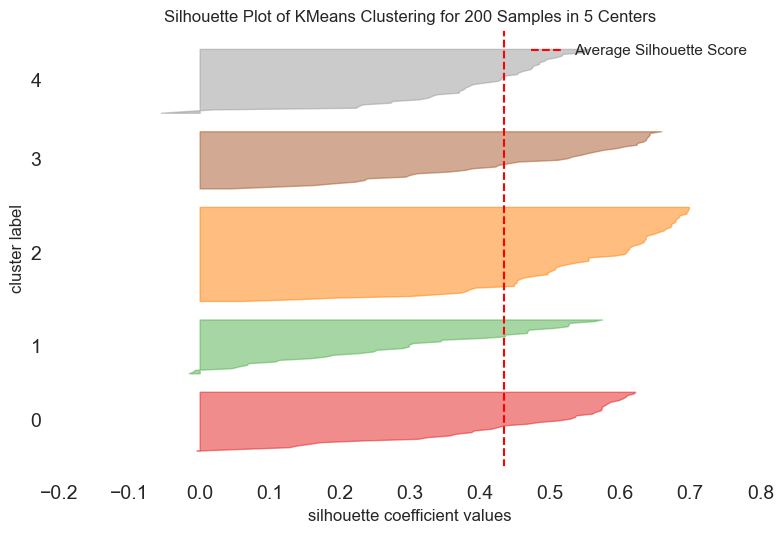

In [43]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer
model_KMeans = KMeans(n_clusters=5, random_state=42, n_init=10)  # we decided n_clusters=3!
visualizer = SilhouetteVisualizer(model_KMeans)  # Corrected variable name here

visualizer.fit(X1)  # Fit the data to the visualizer
visualizer.poof();

# With this feature of yellowbrick, we can see the silhouette scores of each cluster separately.

In [44]:
num_clusters = model_KMeans.n_clusters

print("Number of Clusters:", num_clusters)  # Output: Number of Clusters: 5

Number of Clusters: 5


In [46]:
for i in range(model_KMeans.n_clusters):
    label = (model_KMeans.labels_ == i)
    print(
        f"mean silhouette score for label {i:<5} : {visualizer.silhouette_samples_[label].mean()}"
    )
print(f"mean silhouette score for all labels : {visualizer.silhouette_score_}")

mean silhouette score for label 0     : 0.43344567727922795
mean silhouette score for label 1     : 0.28673565556871045
mean silhouette score for label 2     : 0.5457201332105859
mean silhouette score for label 3     : 0.4488307694310754
mean silhouette score for label 4     : 0.3799744987678471
mean silhouette score for all labels : 0.43350225495428363


### Why silhouette_score is negative?

![image.png](attachment:image.png)

There are a few reasons why a silhouette score can be negative:

1. Overlapping Clusters: If clusters overlap significantly, it becomes challenging to determine which cluster a data point belongs to, resulting in negative silhouette scores.

2. Incorrect Number of Clusters (K): If the number of clusters (K) chosen for clustering is not appropriate for the data, it can lead to poorly separated clusters and negative silhouette scores.

3. Outliers: Outliers can adversely affect the silhouette score. If an outlier is wrongly assigned to a cluster, it can reduce the average similarity of the cluster, leading to negative scores.

4. Random Assignments: If the initial clustering assignments in the algorithm are done randomly, it may lead to suboptimal clusters and negative silhouette scores.

#### *iii. Apply K Means*

In [47]:
K_means_model = KMeans(n_clusters=5, random_state=42, n_init=10)   

In [48]:
K_means_model.fit(X1)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [49]:
K_means_model.predict(X1)

array([3, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 3, 1, 2, 1, 2,
       4, 2, 4, 2, 1, 3, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 0, 2, 1, 3,
       1, 3, 0, 3, 3, 1, 0, 3, 3, 0, 0, 1, 0, 0, 3, 0, 0, 3, 0, 0, 0, 3,
       1, 0, 3, 3, 0, 1, 0, 0, 0, 3, 0, 1, 3, 1, 0, 3, 0, 1, 3, 1, 0, 3,
       3, 0, 0, 3, 0, 1, 1, 3, 1, 3, 1, 3, 3, 0, 0, 3, 0, 3, 0, 0, 0, 0,
       0, 3, 1, 3, 3, 3, 0, 0, 0, 0, 3, 1, 3, 2, 1, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 3, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 1, 2, 4, 2, 1, 3, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2,
       4, 2])

In [50]:
X1_copy = X1.copy()

In [51]:
X1_copy

,Age,spending_score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [52]:
X1_copy["cluster_Kmeans"] = K_means_model.fit_predict(X1)
# Combining all these steps, the line of code assigns the cluster labels obtained from the
# kmeans.fit_predict(X1) to the new column "cluster_Kmeans" in the DataFrame X_coy. 
# After executing this line of code, the DataFrame X_coy will have a new column containing the
# cluster assignments for each data point based on the K-means clustering model.

In [53]:
X1_copy

,Age,spending_score,cluster_Kmeans
0,19,39,3
1,21,81,2
2,20,6,4
3,23,77,2
4,31,40,1
...,...,...,...
195,35,79,2
196,45,28,1
197,32,74,2
198,32,18,4


#### iv. Visualizing and Labeling All the Clusters

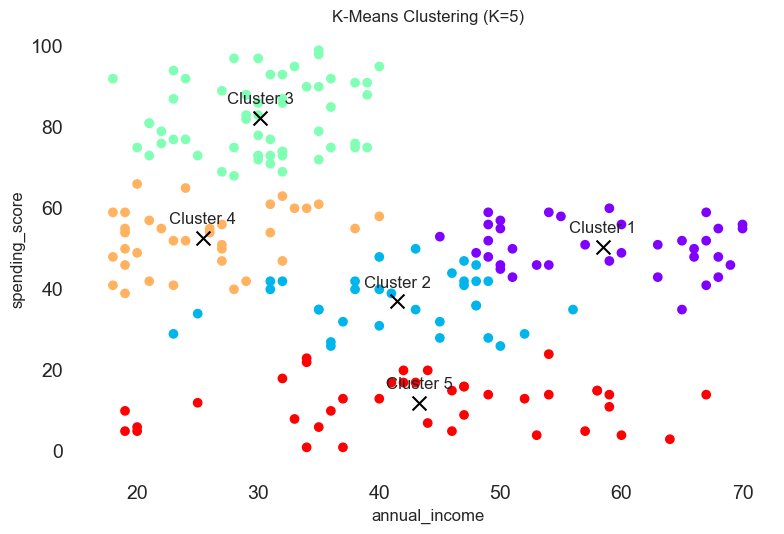

In [54]:
# Specify the number of clusters (K)
K = 5

# Create the KMeans object and fit it to your data
kmeans = KMeans(n_clusters=K, random_state=42)
kmeans.fit(X1_copy)

# Get the cluster assignments for each data point
cluster_labels = kmeans.labels_

# Get the cluster centers (centroids)
cluster_centers = kmeans.cluster_centers_

# Visualize the data points with different colors for each cluster and label them
plt.scatter(X1_copy['Age'], X1_copy['spending_score'], c=cluster_labels, cmap='rainbow')
for i, cluster_center in enumerate(cluster_centers):
    x, y = cluster_center[0], cluster_center[1]  # Unpack the coordinates of the cluster center
    plt.scatter(x, y, c='black', marker='x', s=100)
    plt.annotate(f'Cluster {i+1}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')
plt.xlabel('annual_income')
plt.ylabel('spending_score')
plt.title(f'K-Means Clustering (K={K})')
plt.show();

### Clustering based on Annual Income and Spending Score

We claster the Mall customer data to a sales strategy like targeting

#### *i. Create a new dataset with two variables of your choice*

In [55]:
X2= df[['annual_income', 'spending_score']]

In [56]:
X2.head()

,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [57]:
X2.shape

(200, 2)

In [58]:
hopkins(X2, 1)

0.7031936590577516

#### *ii. Determine optimal number of clusters*

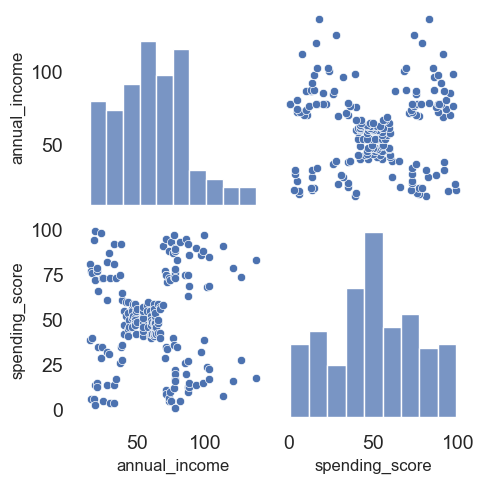

In [59]:
# Create the pair plot
sns.pairplot(X2)
plt.show()

#### Inertia

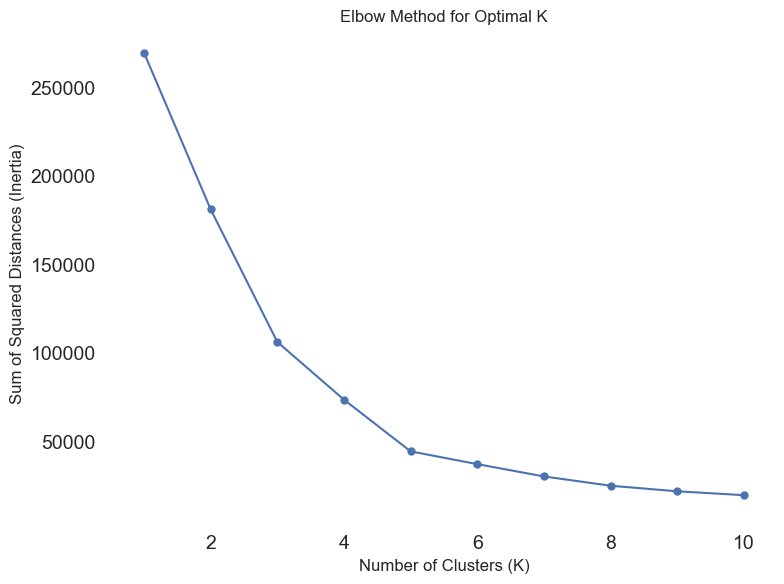

In [60]:
ssd = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X2)
    ssd.append(kmeans.inertia_)  # Inertia represents the sum of squared distances to the nearest centroid


plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), ssd, marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (Inertia)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

### distortion

In [61]:
### distortion
K = range(2, 10)
distortion = []
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeanModel.fit(X2)
    distances = kmeanModel.transform(X2)  # Use X2 for transformation instead of X
    labels = kmeanModel.labels_
    result = []
    for i in range(k):
        cluster_distances = distances[
            labels == i, i
        ]  # distances from observations in each cluster to their own centroid
        result.append(np.mean(cluster_distances**2))
    distortion.append(sum(result))

Text(0.5, 1.0, 'Elbow Method for Optimal K')

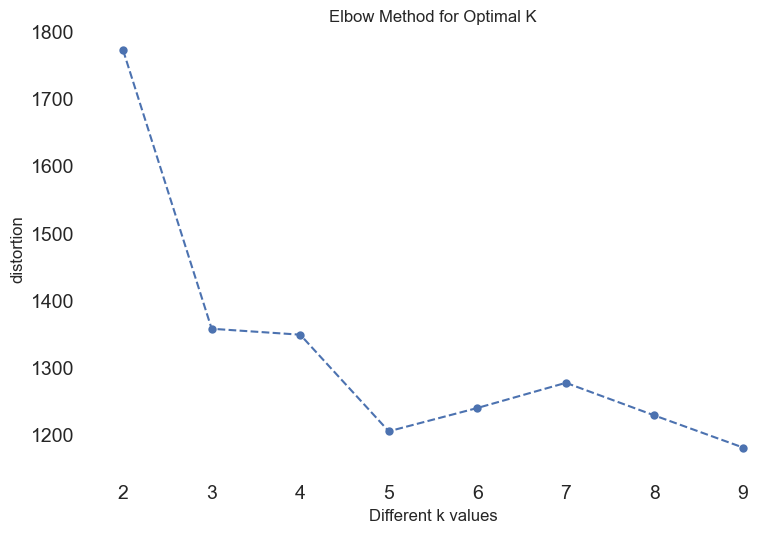

In [62]:
plt.plot(list(K), distortion, "bo--")
plt.xlabel("Different k values")
plt.ylabel("distortion")
plt.title("Elbow Method for Optimal K")

###  Silhouette Score

In [63]:
range_n_clusters = range(2, 10)
for num_clusters in range_n_clusters:
    # Initialize kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    kmeans.fit(X2)
    cluster_labels = kmeans.labels_
    # Silhouette score
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.004873155110381675
For n_clusters=3, the silhouette score is 0.16758575712906634
For n_clusters=4, the silhouette score is 0.14423915122117295
For n_clusters=5, the silhouette score is 0.1632888738101461
For n_clusters=6, the silhouette score is 0.11253664329747584
For n_clusters=7, the silhouette score is 0.054239717819834096
For n_clusters=8, the silhouette score is -0.03782979088042056
For n_clusters=9, the silhouette score is -0.03934418111063459


### Silhouett Score of each cluster

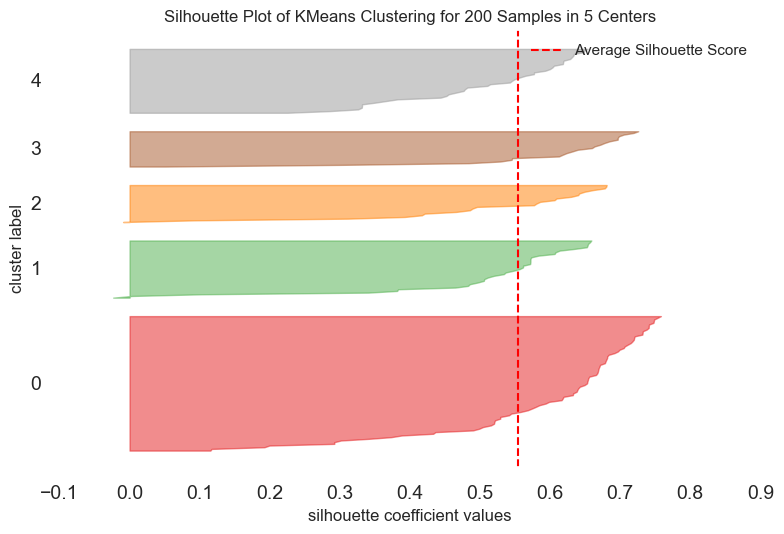

In [64]:
model_KMeans1 = KMeans(n_clusters=5, random_state=42, n_init=10)  # we decided n_clusters=3!
visualizer = SilhouetteVisualizer(model_KMeans1)  
visualizer.fit(X2)  # Fit the data to the visualizer
visualizer.poof();

#### *iii. Apply K Means*

In [68]:
K_means_model2 = KMeans(n_clusters=5, random_state=42, n_init=10)   
K_means_model2.fit(X2)

KMeans(n_clusters=5, n_init=10, random_state=42)

In [69]:
K_means_model2.predict(X2)

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 1, 4, 0, 4, 1, 4, 1, 4,
       0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 0, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4,
       1, 4])

In [70]:
X2_copy = X2.copy()

In [72]:
X2_copy.head()

,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [74]:
X2_copy['cluster_Kmeans'] = K_means_model2.fit_predict(X2) #kmeans2.labels_
X2_copy

,annual_income,spending_score,cluster_Kmeans
0,15,39,2
1,15,81,3
2,16,6,2
3,16,77,3
4,17,40,2
...,...,...,...
195,120,79,4
196,126,28,1
197,126,74,4
198,137,18,1


#### *iv. Visualizing and Labeling All the Clusters*

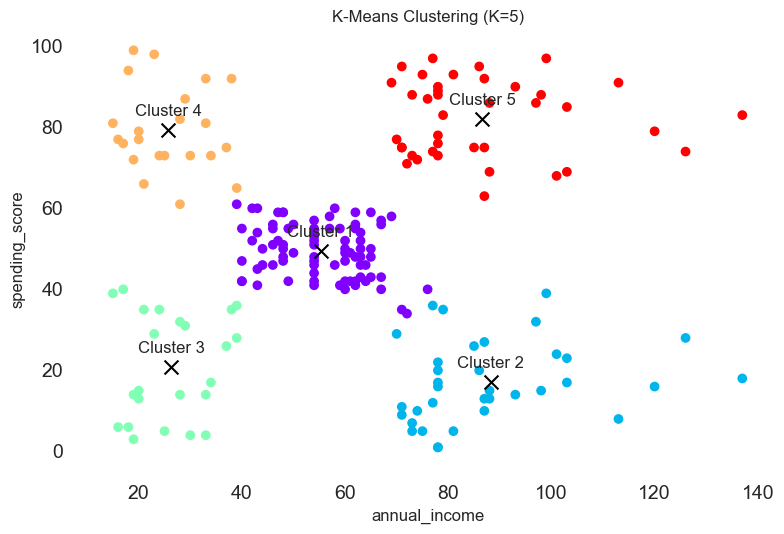

In [76]:
# Specify the number of clusters (K)
K = 5

# Create the KMeans object and fit it to your data
kmeans = KMeans(n_clusters=K, random_state=42)
kmeans.fit(X2_copy)

# Get the cluster assignments for each data point
cluster_labels = kmeans.labels_

# Get the cluster centers (centroids)
cluster_centers = kmeans.cluster_centers_

# Visualize the data points with different colors for each cluster and label them
plt.scatter(X2_copy['annual_income'], X2_copy['spending_score'], c=cluster_labels, cmap='rainbow')
for i, cluster_center in enumerate(cluster_centers):
    x, y = cluster_center[0], cluster_center[1]  # Unpack the coordinates of the cluster center
    plt.scatter(x, y, c='black', marker='x', s=100)
    plt.annotate(f'Cluster {i+1}', (x, y), textcoords="offset points", xytext=(0, 10), ha='center')
plt.xlabel('annual_income')
plt.ylabel('spending_score')
plt.title(f'K-Means Clustering (K={K})')
plt.show();

### Hierarchical Clustering

Hierarchical clustering is one of the popular and easy to understand clustering technique. This clustering technique is divided into two types:

Agglomerative
Divisive
Agglomerative Hierarchical clustering Technique: In this technique, initially each data point is considered as an individual cluster. At each iteration, the similar clusters merge with other clusters until one cluster or K clusters are formed.

The basic algorithm of Agglomerative is straight forward.

Compute the proximity matrix Let each data point be a cluster Repeat: Merge the two closest clusters and update the proximity matrix Until only a single cluster remains Key operation is the computation of the proximity of two clusters.

To understand better let’s see a pictorial representation of the Agglomerative Hierarchical clustering Technique. Lets say we have six data points {A,B,C,D,E,F}.

Step- 1: In the initial step, we calculate the proximity of individual points and consider all the six data points as individual clusters as shown in the image below.
Step- 2: In step two, similar clusters are merged together and formed as a single cluster. Let’s consider B,C, and D,E are similar clusters that are merged in step two. Now, we’re left with four clusters which are A, BC, DE, F.
Step- 3: We again calculate the proximity of new clusters and merge the similar clusters to form new clusters A, BC, DEF.
Step- 4: Calculate the proximity of the new clusters. The clusters DEF and BC are similar and merged together to form a new cluster. We’re now left with two clusters A, BCDEF.
Step- 5: Finally, all the clusters are merged together and form a single cluster. The Hierarchical clustering Technique can be visualized using a Dendrogram.
A Dendrogram is a tree-like diagram that records the sequences of merges or splits


### *i. Determine optimal number of clusters using Dendogram*

### Clustering based on Age and Spending Score- x1

#### Age and Spending Score- x1

In [88]:
X1

,Age,spending_score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


##### Dendogram

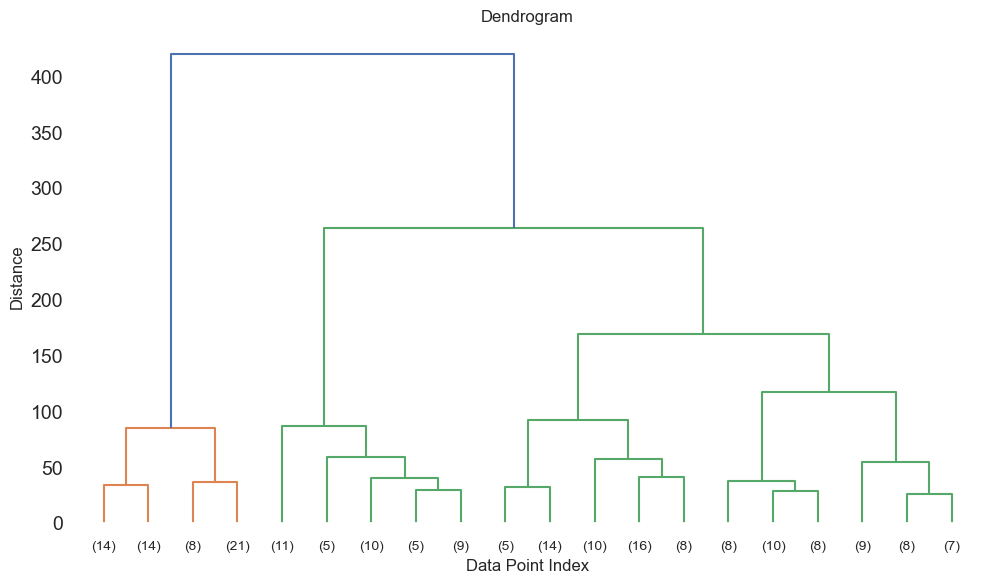

In [89]:
# Assuming your DataFrame is called 'x', convert it to a NumPy array
x_array = X1.to_numpy()

# Perform hierarchical clustering
A = linkage(x_array, method='ward')
B = linkage(x_array, method='average')
C = linkage(x_array, method='complete')
D = linkage(x_array, method= 'single')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
plt.title('Dendrogram')
plt.xlabel('Data Point Index')
plt.ylabel('Distance')
dendrogram(A, leaf_font_size=10, truncate_mode='lastp', p=20)

plt.show();

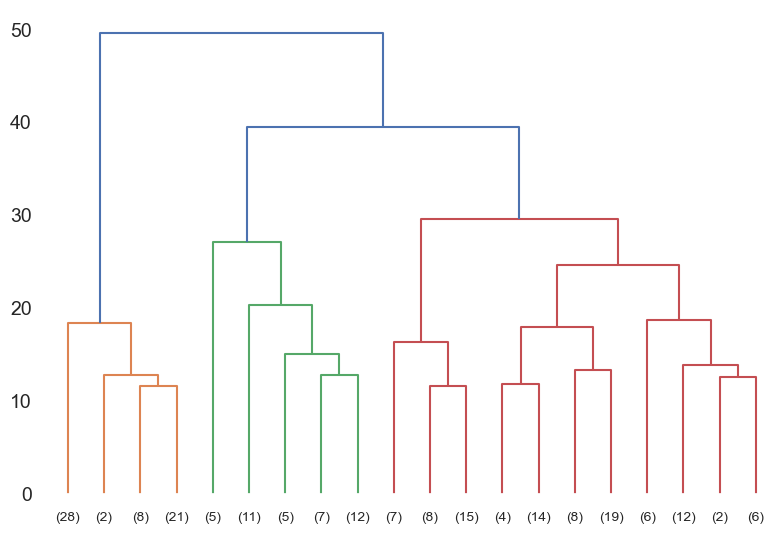

In [90]:
dendrogram(B, leaf_font_size=10, truncate_mode='lastp', p=20)

plt.show()

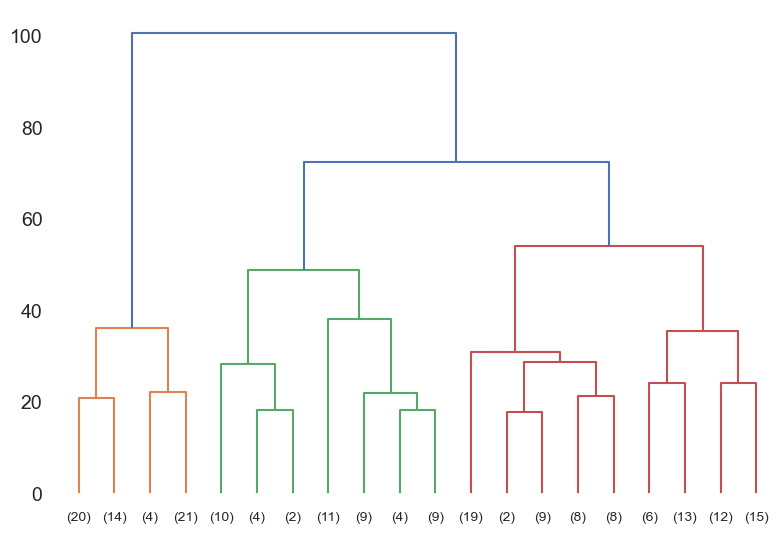

In [91]:
dendrogram(C, leaf_font_size=10, truncate_mode='lastp', p=20)
plt.show()

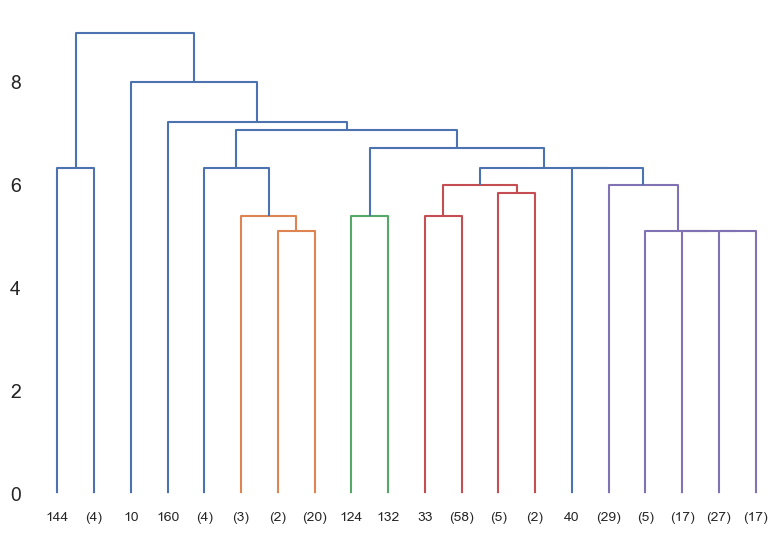

In [92]:
dendrogram(D, leaf_font_size=10, truncate_mode='lastp', p=20)
plt.show()

### Silhouett Score 

In [93]:
range_n_clusters = range(2, 10)
for num_clusters in range_n_clusters:
  
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X1)
    cluster_labels = Agg_model.labels_
    
    silhouette_avg = silhouette_score(X1, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.4549465643222241
For n_clusters=3, the silhouette score is 0.4411791686353356
For n_clusters=4, the silhouette score is 0.4602496389565028
For n_clusters=5, the silhouette score is 0.40374071753059787
For n_clusters=6, the silhouette score is 0.4125958704145705
For n_clusters=7, the silhouette score is 0.4158977524079244
For n_clusters=8, the silhouette score is 0.3883688959732531
For n_clusters=9, the silhouette score is 0.3948151533262091


## Clustering based on Annual Income and Spending Score- x2

In [94]:
X2

,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


#### Dendogram

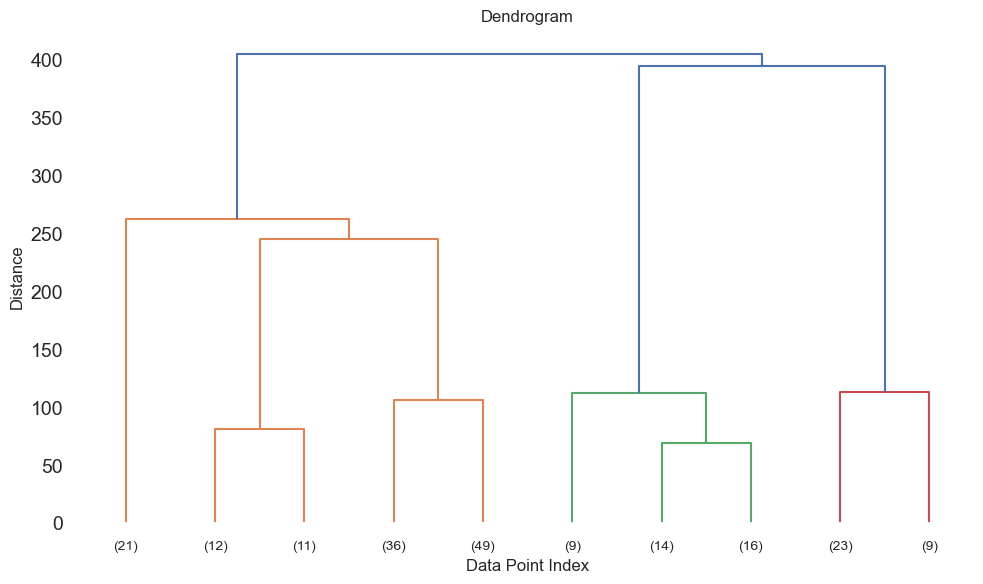

In [95]:
x2_array = X2.to_numpy()

# Perform hierarchical clustering
E = linkage(x2_array, method='ward')
F = linkage(x2_array, method='average')
G = linkage(x2_array, method='complete')
H = linkage(x2_array, method='single')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
plt.title('Dendrogram')
plt.xlabel('Data Point Index')
plt.ylabel('Distance')
dendrogram(E, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.show()

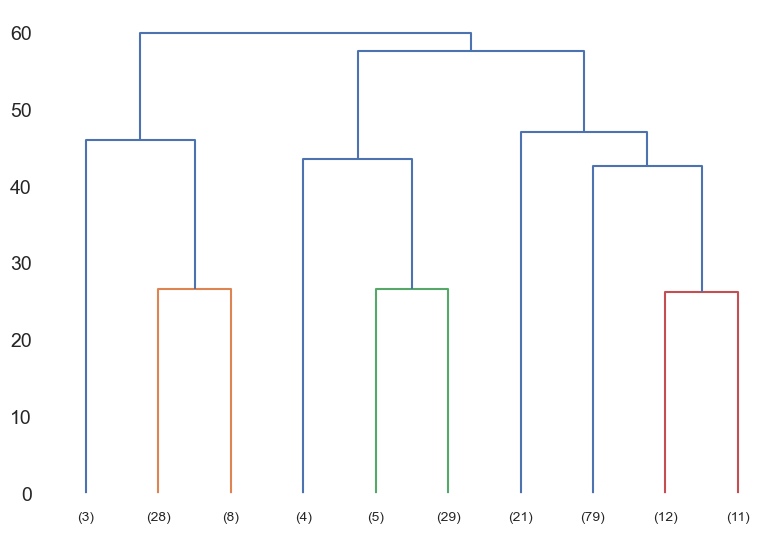

In [96]:
dendrogram(F, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.show()

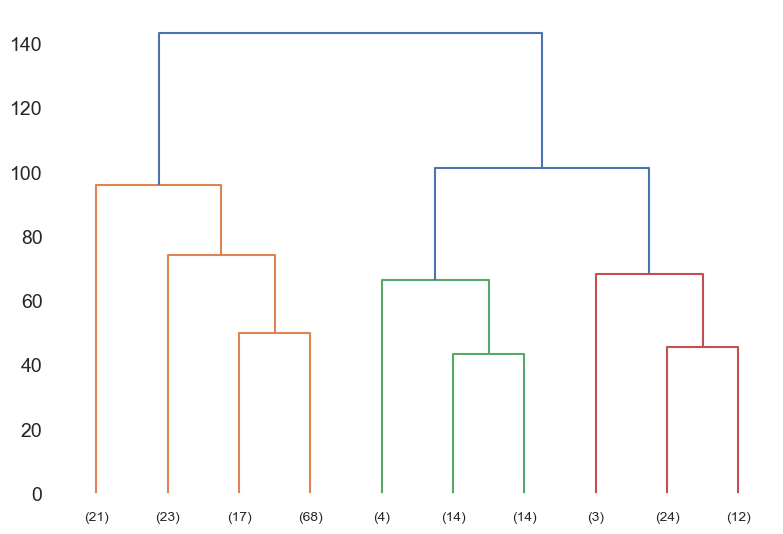

In [97]:
dendrogram(G, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.show()

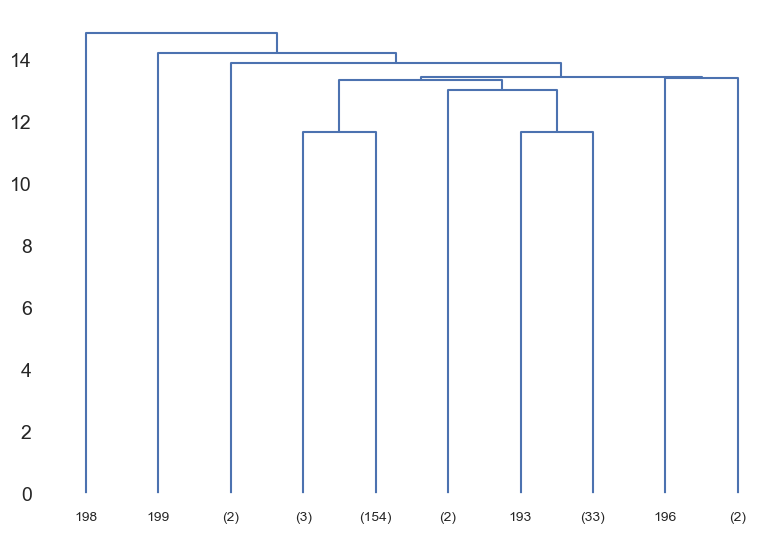

In [98]:
dendrogram(H, leaf_font_size=10, truncate_mode='lastp', p=10)

plt.show()

#### Silhouette Score

In [100]:
range_n_clusters = range(2, 10)
for num_clusters in range_n_clusters:
  
    Agg_model = AgglomerativeClustering(n_clusters=num_clusters)
    Agg_model.fit(X2)
    cluster_labels = Agg_model.labels_
    
    silhouette_avg = silhouette_score(X2, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.36706444723912895
For n_clusters=3, the silhouette score is 0.4618340266628975
For n_clusters=4, the silhouette score is 0.4916598193892782
For n_clusters=5, the silhouette score is 0.5529945955148897
For n_clusters=6, the silhouette score is 0.5380208285578872
For n_clusters=7, the silhouette score is 0.519904611908887
For n_clusters=8, the silhouette score is 0.4326286245782246
For n_clusters=9, the silhouette score is 0.43892545672004507


### ii. *Apply Agglomerative Clustering*

In [101]:
X1

,Age,spending_score
0,19,39
1,21,81
2,20,6
3,23,77
4,31,40
...,...,...
195,35,79
196,45,28
197,32,74
198,32,18


In [113]:
Agg1omerate_1 = AgglomerativeClustering(
    n_clusters=4,
    metric=
    'euclidean',  # If linkage = "ward" then metric='euclidean' is required.
    linkage='ward')  # originating from the formulation of variance...
y_agglomerate1 = Agg1omerate.fit_predict(X1)

In [114]:
X1_copy

,Age,spending_score,cluster_Kmeans,cluster_Agg
0,19,39,3,0
1,21,81,2,3
2,20,6,4,2
3,23,77,2,3
4,31,40,1,0
...,...,...,...,...
195,35,79,2,3
196,45,28,1,0
197,32,74,2,3
198,32,18,4,2


In [115]:
X1_copy['cluster_Agg'] = y_agglomerate1
X1_copy.head()

,Age,spending_score,cluster_Kmeans,cluster_Agg
0,19,39,3,0
1,21,81,2,3
2,20,6,4,2
3,23,77,2,3
4,31,40,1,0


#### Annual Income and Spending Score- x2

In [108]:
X2

,annual_income,spending_score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [124]:
Agg1omerate_2 = AgglomerativeClustering(
    n_clusters=5,
    metric=
    'euclidean',  # If linkage = "ward" then metric='euclidean' is required.
    linkage='ward')  # originating from the formulation of variance...
y_agglomerate2 = Agg1omerate.fit_predict(X1)

In [129]:
from sklearn.cluster import AgglomerativeClustering

# Assuming X1 is a valid DataFrame containing data for clustering

# Create the AgglomerativeClustering object
Agg1omerate_2 = AgglomerativeClustering(
    n_clusters=4,
    affinity='euclidean',  # Use 'affinity' instead of 'metric'
    linkage='ward')

In [130]:
# Perform clustering and get cluster labels
y_agglomerate2 = Agg1omerate_2.fit_predict(X1)

# Add the cluster labels to the DataFrame X1_copy
X1_copy['cluster_Agg'] = y_agglomerate2


In [125]:
X2_copy

,annual_income,spending_score,cluster_Kmeans,cluster_Agg
0,15,39,2,0
1,15,81,3,3
2,16,6,2,2
3,16,77,3,3
4,17,40,2,0
...,...,...,...,...
195,120,79,4,3
196,126,28,1,0
197,126,74,4,3
198,137,18,1,2


In [126]:
X2_copy['cluster_Agg'] = y_agglomerate2
X2_copy.head()

,annual_income,spending_score,cluster_Kmeans,cluster_Agg
0,15,39,2,0
1,15,81,3,3
2,16,6,2,2
3,16,77,3,3
4,17,40,2,0


### iii. *Visualizing and Labeling All the Clusters* 

#### Age and Spending Score- x1

In [127]:
X1_copy

,Age,spending_score,cluster_Kmeans,cluster_Agg
0,19,39,3,0
1,21,81,2,3
2,20,6,4,2
3,23,77,2,3
4,31,40,1,0
...,...,...,...,...
195,35,79,2,3
196,45,28,1,0
197,32,74,2,3
198,32,18,4,2


<Axes: xlabel='Age', ylabel='spending_score'>

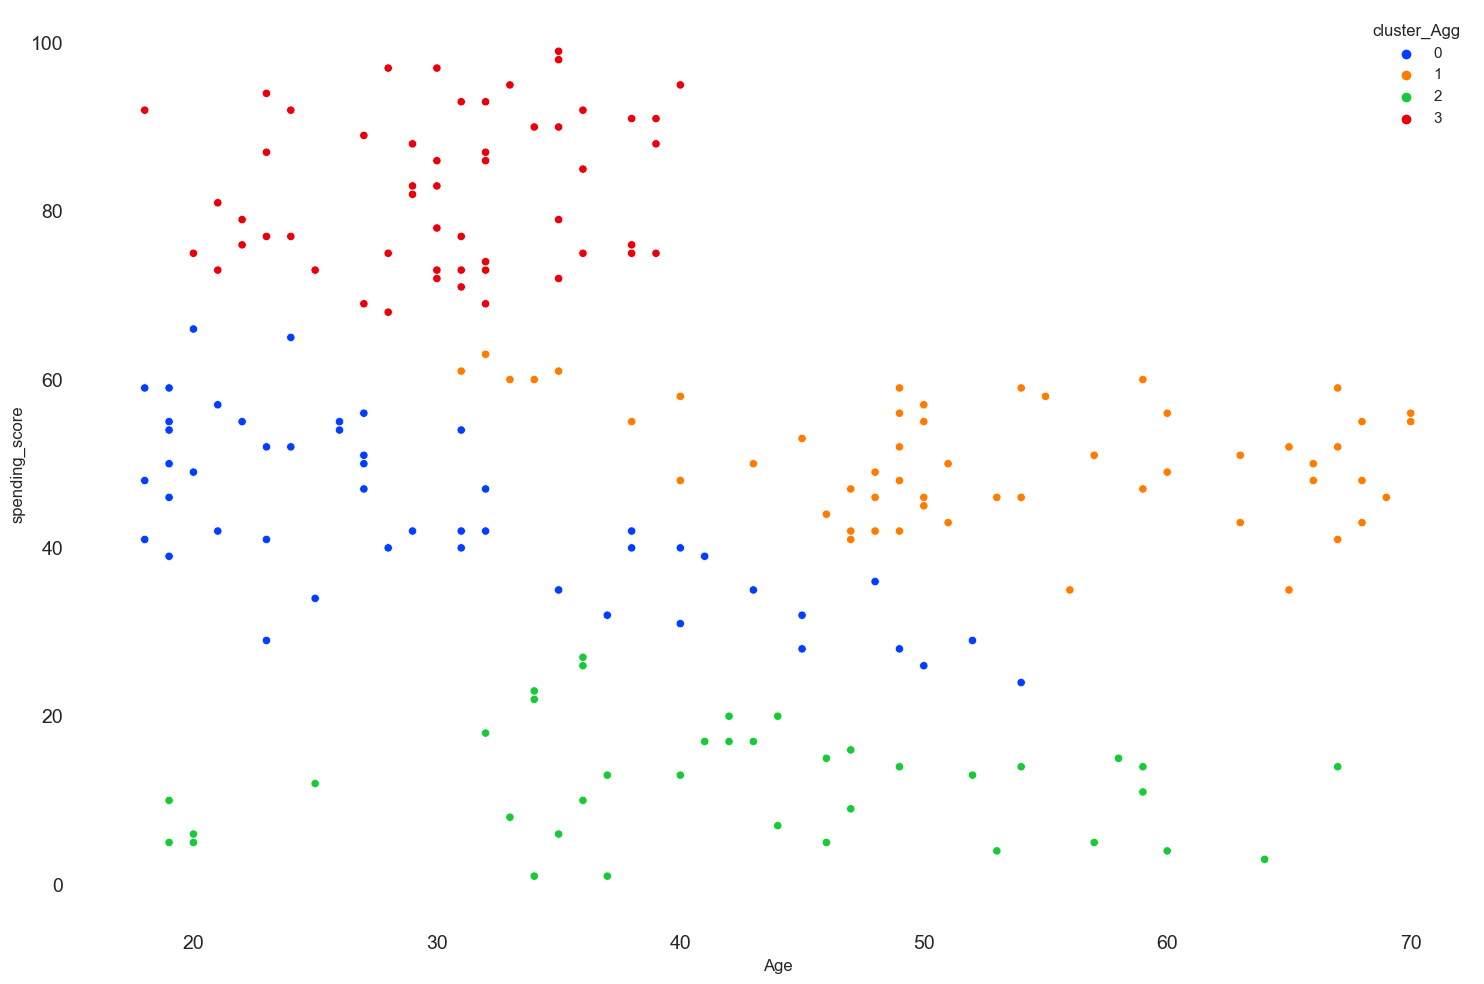

In [133]:
plt.figure(figsize=(15, 10))
sns.scatterplot(
    x='Age',
    y='spending_score', 
    hue='cluster_Agg',
    data=X1_copy,
    palette='bright'
)

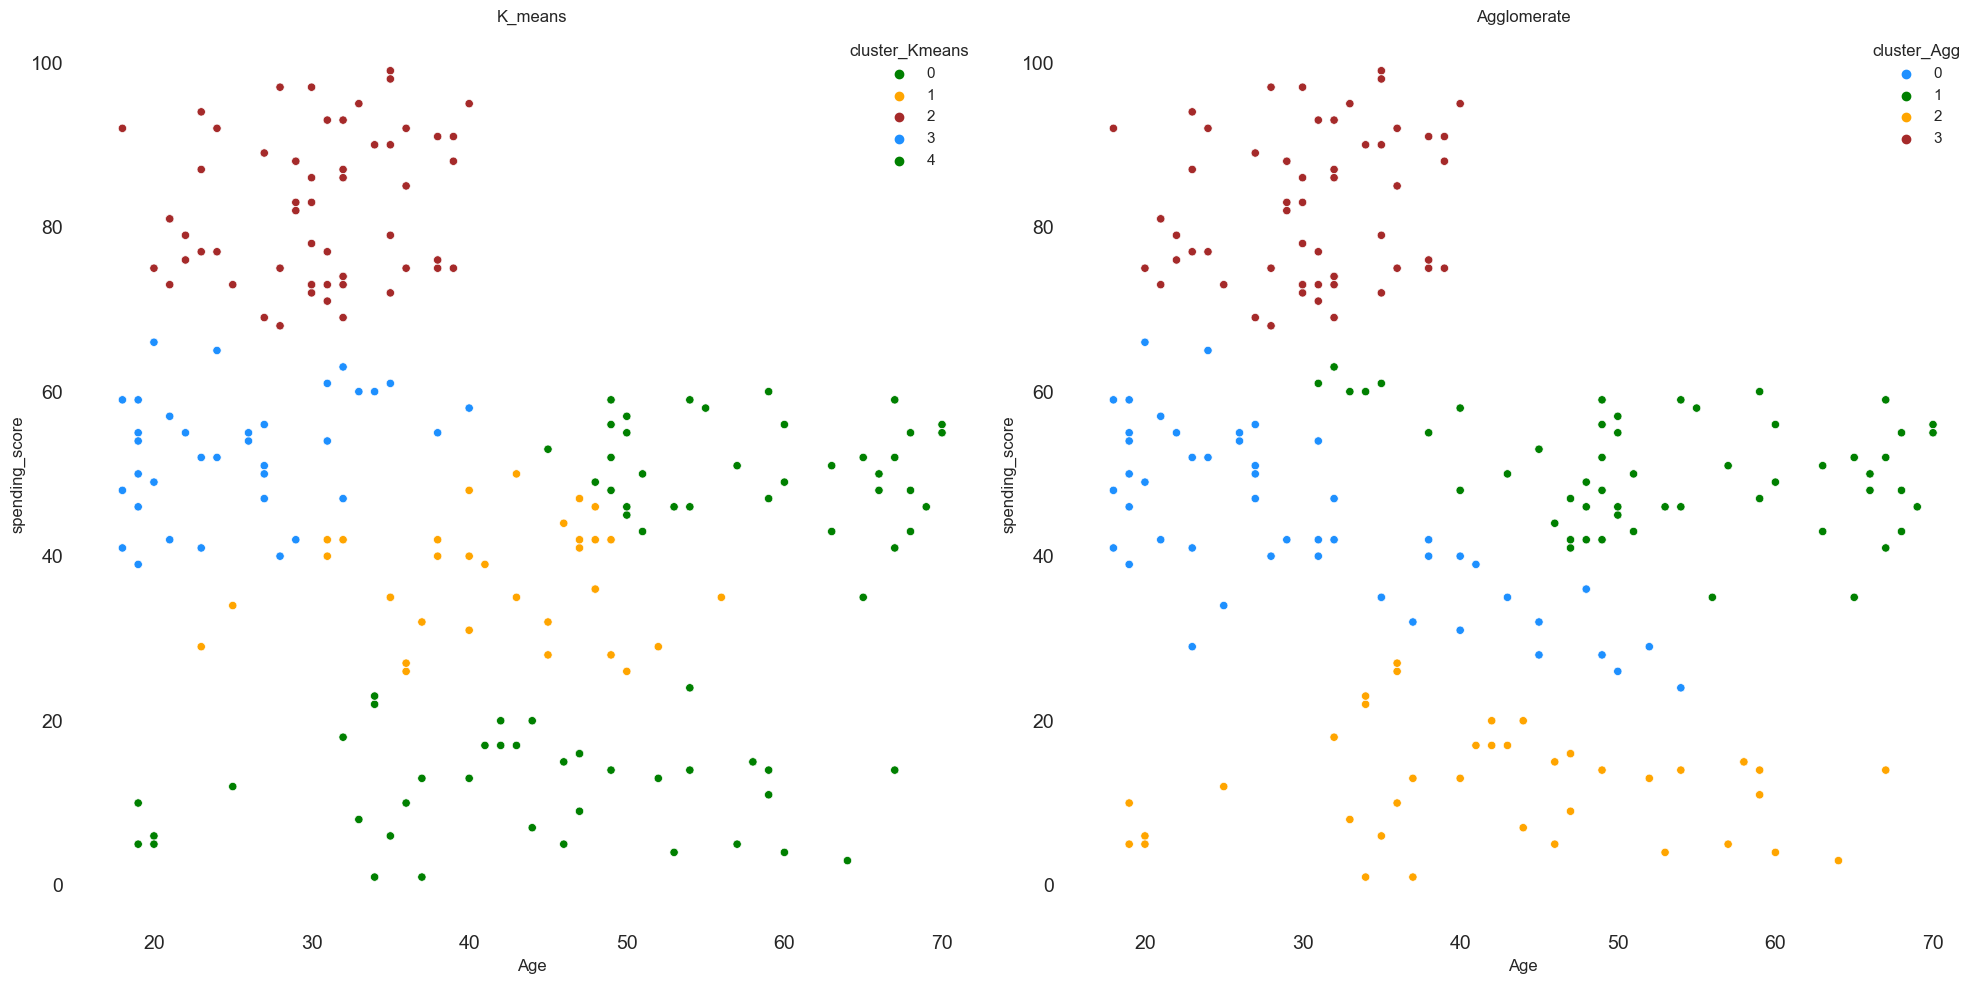

In [135]:
plt.figure(figsize=(20, 10))

plt.subplot(121)
sns.scatterplot(x='Age',
                y='spending_score',  # Correct the column name to 'spending_score'
                hue='cluster_Kmeans',  # Assuming you have another clustering result for K-means
                data=X1_copy,
                palette=['green', 'orange', 'brown', 'dodgerblue'])
plt.title("K_means")

plt.subplot(122)
sns.scatterplot(x='Age',
                y='spending_score',  # Correct the column name to 'spending_score'
                hue='cluster_Agg',
                data=X1_copy,
                palette=['dodgerblue', 'green', 'orange', 'brown'])
plt.title("Agglomerate");

#### Annual Income and Spending Score- x2

In [137]:
X2_copy


,annual_income,spending_score,cluster_Kmeans,cluster_Agg
0,15,39,2,0
1,15,81,3,3
2,16,6,2,2
3,16,77,3,3
4,17,40,2,0
...,...,...,...,...
195,120,79,4,3
196,126,28,1,0
197,126,74,4,3
198,137,18,1,2


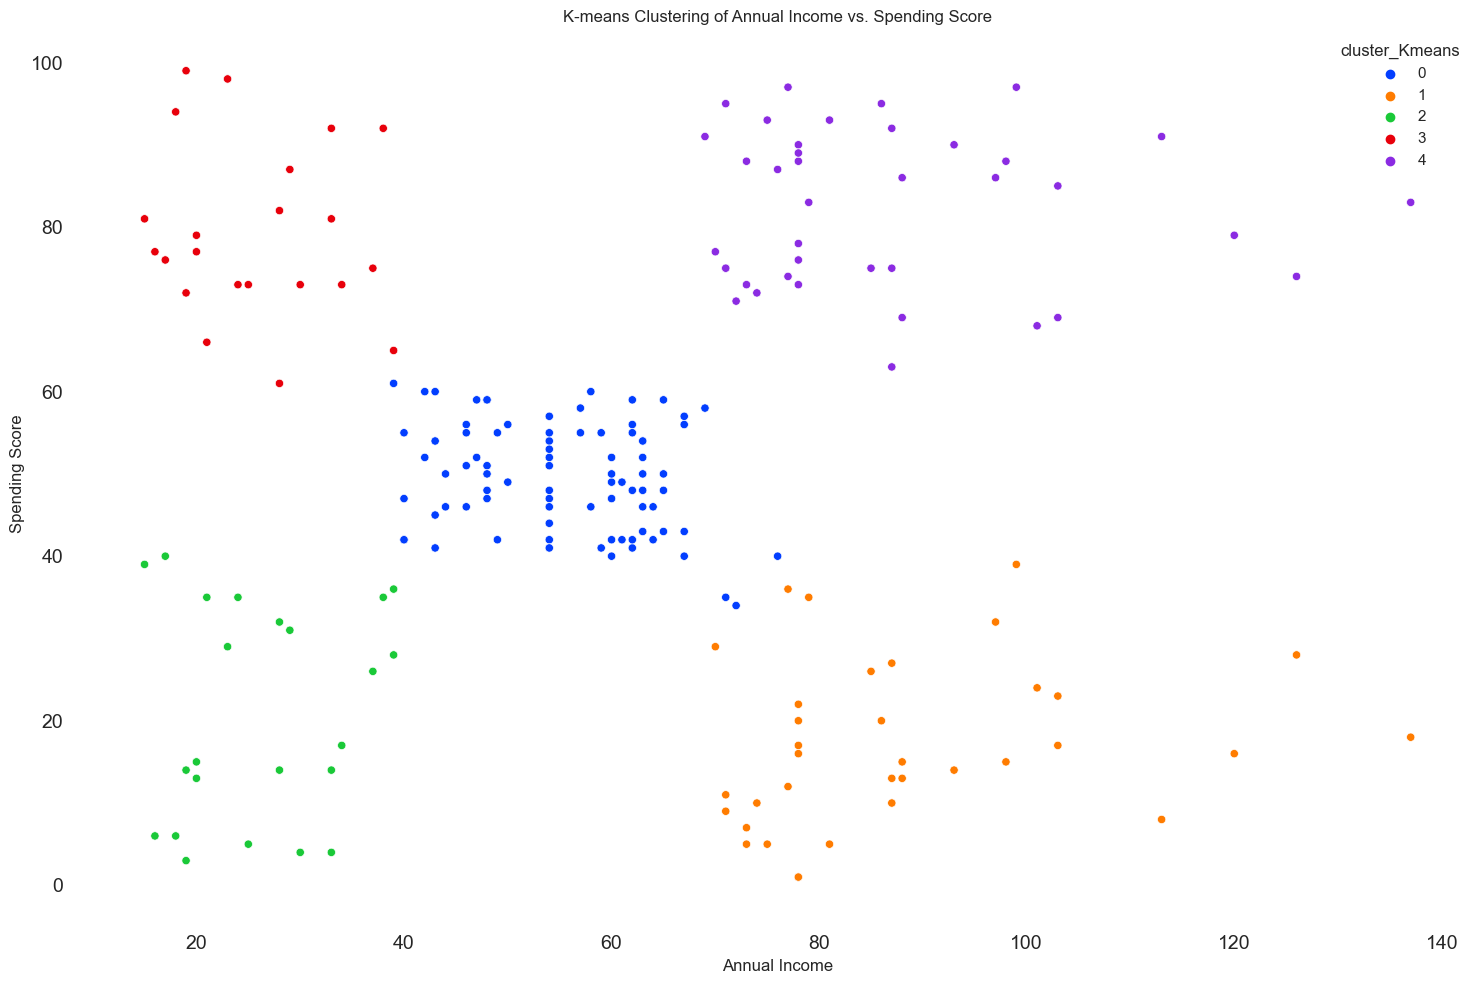

In [140]:
plt.figure(figsize=(15, 10))
sns.scatterplot(
    x='annual_income',
    y='spending_score', 
    hue='cluster_Kmeans', s
    data=X2_copy,
    palette='bright'
)
plt.title('K-means Clustering of Annual Income vs. Spending Score')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.grid(True)
plt.show()

#### Interpretation based on Age and Spending Score- x1

In [141]:
X1_copy

,Age,spending_score,cluster_Kmeans,cluster_Agg
0,19,39,3,0
1,21,81,2,3
2,20,6,4,2
3,23,77,2,3
4,31,40,1,0
...,...,...,...,...
195,35,79,2,3
196,45,28,1,0
197,32,74,2,3
198,32,18,4,2


In [142]:
cluster_counts = X2_copy['cluster_Kmeans'].value_counts()

cluster_counts

0    81
4    39
1    35
2    23
3    22
Name: cluster_Kmeans, dtype: int64

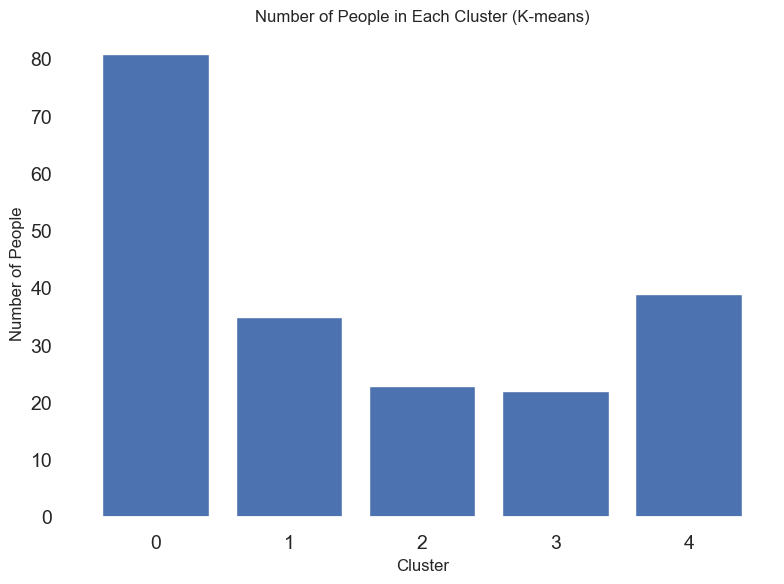

In [147]:
plt.figure(figsize=(8, 6))
cluster_counts = X2_copy['cluster_Kmeans'].value_counts()
plt.bar(cluster_counts.index, cluster_counts)
plt.xlabel('Cluster')
plt.ylabel('Number of People')
plt.title('Number of People in Each Cluster (K-means)')
plt.grid(True)
plt.bar_label(ax.containers[0])
plt.show()

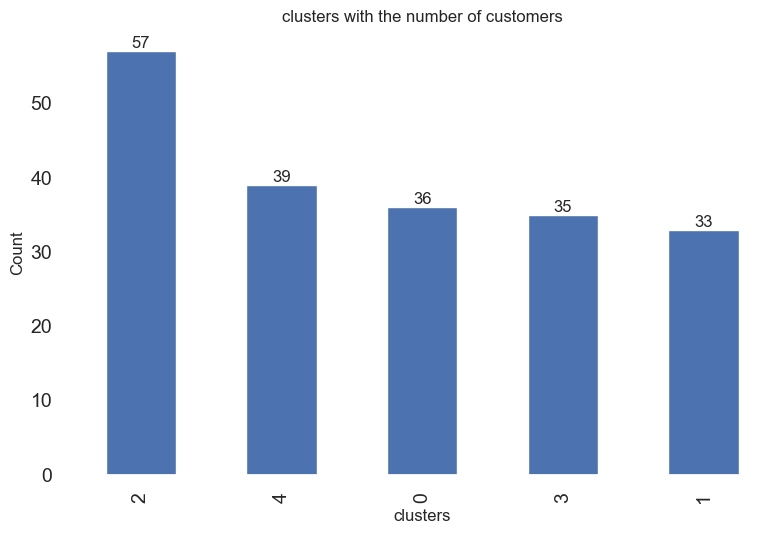

In [150]:
plt.title("clusters with the number of customers")
plt.xlabel("clusters")
plt.ylabel("Count")
ax = X1_copy.cluster_Kmeans.value_counts().plot(kind='bar')
ax.bar_label(ax.containers[0])
plt.show()

### Conclusion

**cluster 0** : The average age is around 55, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

**cluster 1**: The average age is around 45, the annula_income is high but the spending_scores are very low. 
This group is our target audience and specific strategies should be developed to drive this group to spend.

**cluster 2** :The average age is around 30. The annula_income is high and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.    
    
**cluster 3**: The average age is around 25.both annula_income and spending_scores are on average. 
It should be researched what can be done to direct to more spending.

#### Interpretation based on Annual Income and Spending Score- x2

In [151]:
df["cluster_Age_Spending_Score"] = X1_copy.cluster_Kmeans
df.head()

,Gender,Age,annual_income,spending_score,cluster_Age_Spending_Score
0,Male,19,15,39,3
1,Male,21,15,81,2
2,Female,20,16,6,4
3,Female,23,16,77,2
4,Female,31,17,40,1


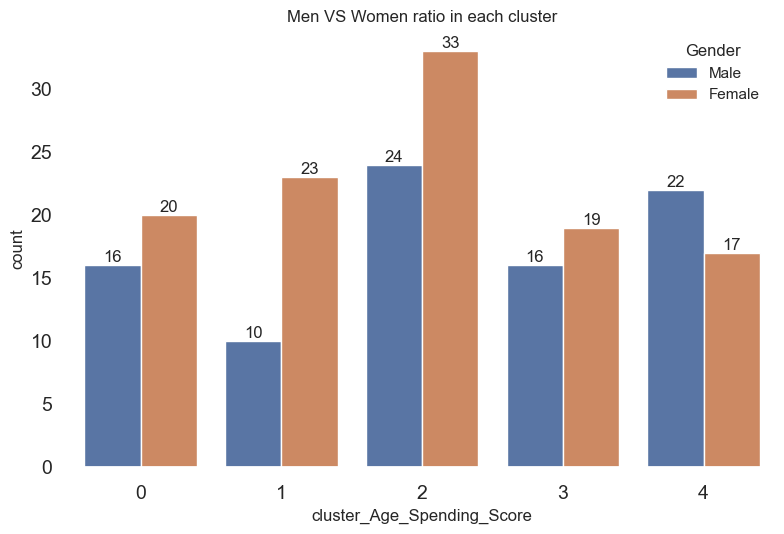

In [152]:
plt.title("Men VS Women ratio in each cluster")
plt.ylabel("Count")
ax = sns.countplot(x=df.cluster_Age_Spending_Score, hue=df.Gender)
for p in ax.containers:
    ax.bar_label(p)
# We count clusters according to gender.

## Conclusion

### Female

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 45, the annula_income is very high but the spending_scores is low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

### Male

**cluster 0** : The average age is around 45, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 40, the annula_income is very high but the spending_scores is very low.
This group is our target audience and special strategies need to be developed for this group.    

**cluster 2** :The average age is around 50. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 30, the annual income and the spending_score
is very high. This group consists of our loyal customers. Our company derives the main profit from this group. 
Very special promotions can be made in order not to miss it.

**cluster 0** : The average age is around 40, both annula_income and spending_scores are on average. 
It should be researched what can be done to direct more spending.

**cluster 1**: The average age is around 30, both annula_income and spending_scores are very high. 
This group consists of our loyal customers. Our company derives the main profit from this group. Very 
special promotions can be made in order not to miss it.

**cluster 2** :The average age is around 45. Both annula_income and spending_scores are low. It can be 
directed to shopping with gift certificates.

**cluster 3**: The average age is around 25. Low annual_incomes but very high spending scores. This 
group does a lot of shopping, but they do not bring much profit.

**cluster 4**: The average age is around 40, their annual income is very high but their spending_score
is very low. This group is our target audience and special strategies need to be developed for this 
group.

Interpretation:

The Hopkins statistic ranges from 0 to 1, where:

A value close to 0 indicates that the data has a high tendency to cluster, suggesting that it is suitable for clustering algorithms.
A value close to 1 suggests that the data has a low tendency to cluster, implying that clustering might not be meaningful or appropriate for this dataset.
In this case, the mean value of approximately 0.7018 indicates that the dataset shows a moderate tendency to form clusters. It suggests that clustering algorithms might be applicable to this dataset, but the clustering structure might not be as strong and well-defined as datasets with lower Hopkins statistics. Further analysis and exploration of the data with different clustering techniques might be necessary to identify meaningful patterns and structures in the dataset.

#  Acknowledgement:


#### Instructor Edward W.
#### Instructor Orion
#### https://www.kaggle.com/code code contributors
#### https://chat.openai.com/


___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___